<a href="https://colab.research.google.com/github/brettfazio/AI-Homework/blob/master/HW_2/HW2_problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I will be extending the mini batch gradient descent [here](https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb#scrollTo=VxD98YQlLRi3) to the case of n=2.

I will then visualize the data.

The code is vectorized.

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time

Generate the data which is just a parabolic curve whose z-value increases in the 3d plane

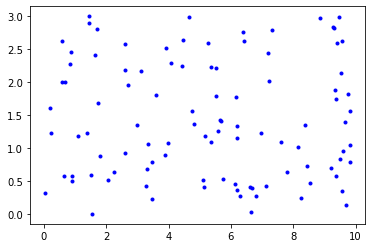

Text(0.5, 0, 'y')

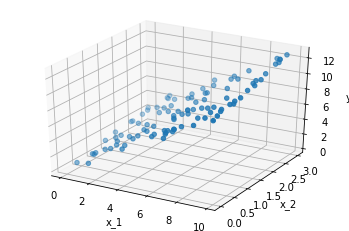

In [2]:
m = 100

x_1 = 10 * np.random.rand(m,1)
x_2 = 3 * np.random.rand(m,1)

y = x_1 + x_2

plt.plot(x_1, x_2, "b.")
plt.show()

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.scatter(x_1, x_2, y)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

**Mini Batch gradient descent**

Set up vectors & parameters

In [3]:
X_b = np.column_stack([np.ones((m,1)), x_1, x_2])

print(X_b.shape)

epochs = 20
lr = 0.001

initial_weight = np.random.randn(3,1)

# Sanity check
print(initial_weight.shape)
print(y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)

(100, 3)
(3, 1)
(100, 1)
(100, 1)
(3, 1)


Start the mini-batch gradient descent

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)

for epoch in range(epochs):
  shuffled_idxes = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_idxes]
  y_shuffled = y[shuffled_idxes]
  for i in range(0, m, batch_size):
    xi = X_b_shuffled[i:i+batch_size]
    yi = y_shuffled[i:i+batch_size]
    gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
    weight = weight - lr * gradient
    weight_path_mgd.append(weight)

Visualize the mini-batch gradient descent

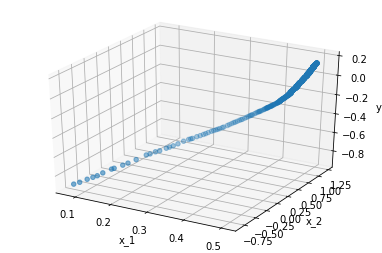

In [5]:
np_weight_path_mgd = np.array(weight_path_mgd)

# plt.plot(weight_path_mgd[:,0], weight_path_mgd[:,1], "g-s", linewidth=2, label="mini-batch")
# plt.show()

fig = plt.figure()

ax = plt.axes(projection='3d')

ax.scatter(np_weight_path_mgd[:,0], np_weight_path_mgd[:,1], np_weight_path_mgd[:,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
plt.gcf().set_size_inches(1.1 * plt.gcf().get_size_inches())

Use it to predict some values

In [6]:
X_new = np.array([[1], [5], [25]])
X_new_b = np.column_stack([np.ones((3,1)), X_new])

m_pre = 50
x_1_pre = 10 * np.random.rand(m,1)
x_2_pre = 3 * np.random.rand(m,1)

y_pre = x_1_pre + x_2_pre

X_test = np.column_stack([np.ones((m,1)), x_1_pre, x_2_pre])

X_test.shape

(100, 3)

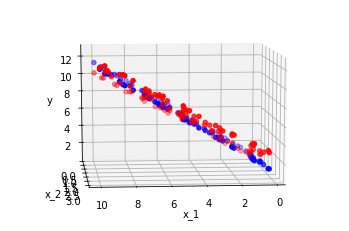

In [9]:
y_predict = X_test.dot(weight)

fig = plt.figure()

ax = plt.axes(projection='3d')

# Predictions in blue
ax.scatter(x_1_pre, x_2_pre, y_pre, c='red')
ax.scatter(x_1_pre, x_2_pre, y_predict, c='blue')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

ax.view_init(10, 85)